In [6]:
import pandas as pd
import numpy as np
import sklearn
from scipy.stats import skew, kurtosis
from scipy.stats import describe
from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt
import scipy.linalg
import pprint as pprint
import time as time
from sklearn.decomposition import PCA

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,432.011322,167.863144,292.261475,155.167007,291.920013,135.526001,135.300003,217.699997,242.443298,314.279999,...,197.263107,64.592575,46.290192,151.118790,58.443172,377.068665,247.324020,48.182598,60.352272,66.789505
1,438.978333,171.749573,297.680664,156.510498,307.476654,136.608505,136.425507,221.000000,264.702484,316.200012,...,199.789520,64.328896,46.502743,159.029022,58.653572,372.440185,255.490829,49.446892,62.076630,67.673614
2,439.470337,171.511032,297.333191,158.100494,307.796661,137.738007,137.487503,216.539993,264.862305,315.649994,...,201.139511,64.172638,46.770744,165.211960,59.198696,377.000458,256.349976,50.203476,61.990410,65.915215
3,430.082642,167.863144,288.626679,154.652496,292.116669,132.539002,132.308502,207.710007,244.841064,313.549988,...,194.109894,64.514450,47.473091,157.448944,58.615318,378.822571,248.439911,48.600708,59.921181,64.019295
4,427.297852,166.292648,285.846893,152.601502,285.660004,130.403000,130.467499,206.160004,236.199127,314.799988,...,193.984528,64.455841,47.815025,157.380234,58.385788,376.571686,245.042847,48.381695,59.700851,64.981995


In [ ]:
def calcGeometricReturns(DailyPricesGeo):




In [33]:
sigma= .15
r = 0.05
t = 25/252

# returns = np.random.normal(r, sigma, t)

# geomean= gmean(returns)

In [177]:
import numpy as np

# Define the parameters for the price model
P0 = 100  # initial price
r = 0.05  # expected rate of return
sigma = 0.2  # volatility
T = 1  # time horizon

# Define the time steps
N = 252  # number of trading days per year
dt = T / N  # length of time step

# Calculate the expected value and standard deviation of price at time t for each model


geometricExp = P0 * np.exp(r * T)
geometricStd = P0 * np.sqrt(np.exp(2 * r * T) * (np.exp(sigma**2 * T) - 1))
arithmeticExp = P0 * (1 + r * T)
arithmeticStd = P0 * sigma * np.sqrt(T)
brownianExp = P0 * np.exp(r * T)
brownianStd = P0 * np.sqrt((sigma**2 * T) * (1 + T))

# Print out the results
print("Geometric returns: E(P(t)) = {:.2f}, SD(P(t)) = {:.2f}".format(geometricExp, geometricStd))
print("Arithmetic returns: E(P(t)) = {:.2f}, SD(P(t)) = {:.2f}".format(arithmeticExp, arithmeticStd))
print("Brownian motion: E(P(t)) = {:.2f}, SD(P(t)) = {:.2f}".format(brownianExp, brownianStd))


Geometric returns: E(P(t)) = 105.13, SD(P(t)) = 21.24
Arithmetic returns: E(P(t)) = 105.00, SD(P(t)) = 20.00
Brownian motion: E(P(t)) = 105.13, SD(P(t)) = 28.28


In [34]:
#calculate Classical brownian motion returns given price

# expected

def BrownianClassic(P0, stdev,N):
    r = np.random.normal(0,stdev,N)
    Pt = P0 +r
    return Pt

def GeometricReturn(P0,stdev,N):
    r = np.random.normal(0,stdev,N)
    Pt = P0 * np.exp(r)
    return Pt

def ArithmeticReturn(P0,stdev,N):
    r = np.random.normal(0,stdev,N)
    Pt = P0 + r
    return Pt




def classicalBrownianReturnSimulation(r, t, sigma):
    classical_brownian_return = r * t + sigma * np.random.normal(0,np.sqrt(t)) 
    return classical_brownian_return

#calculate Geometric brownian motion returns
def geometricBrownianReturnSimulation(r, t, sigma):
    geometric_return = np.random.normal((r - 0.5 * sigma**2) * t, sigma * np.sqrt(t))
    return geometric_return

def ArithmeticReturnsSimulation(r,t,sigma):
    arithmetic_return = np.random.normal(r * t, sigma * np.sqrt(t))
    return arithmetic_return

def expected_value(r,t):
    return r*t

def stdev(sigma,t):
    return sigma*np.sqrt(t)





ClassicalBrownianSimOutput = classicalBrownianReturnSimulation(r, t, sigma)
GeometricBrownianSimOutput = geometricBrownianReturnSimulation(r, t, sigma)
ArithmeticBrownianSimOutput = ArithmeticReturnsSimulation(r,t,sigma)

classical_brownian_expected = expected_value(ClassicalBrownianSimOutput, t)
classical_brownian_stddev = stdev(sigma, t)

arithmetic_expected = expected_value(ArithmeticBrownianSimOutput, t)
arithmetic_stddev = stdev(sigma, t)

geometric_expected = expected_value(GeometricBrownianSimOutput - 0.5 * sigma**2, t)
geometric_stddev = stdev(sigma, t)

# Print out the simulated returns and expected values/standard deviations
print('Classical Brownian return:', ClassicalBrownianSimOutput)
print('Expected value:', classical_brownian_expected)
print('Standard deviation:', classical_brownian_stddev)

print('Arithmetic return:', ArithmeticBrownianSimOutput)
print('Expected value:', arithmetic_expected)
print('Standard deviation:', arithmetic_stddev)

print('Geometric return:', GeometricBrownianSimOutput)
print('Expected value:', geometric_expected)
print('Standard deviation:', geometric_stddev)


Classical Brownian return: -0.007260770834972103
Expected value: -0.0007203145669615181
Standard deviation: 0.0472455591261534
Arithmetic return: 0.07712174740538247
Expected value: 0.007650967004502228
Standard deviation: 0.0472455591261534
Geometric return: -0.03225179634085851
Expected value: -0.004315654398894693
Standard deviation: 0.0472455591261534


In [164]:
DailyPricesAritmetic = pd.read_csv("DailyPrices.csv")
DailyPricesGeo = pd.read_csv("DailyPrices.csv")
DailyPricesClassicBrownian = pd.read_csv("DailyPrices.csv")
#Calculate Geometric Brownian Returns from Daily Prices


In [165]:
import pandas as pd
import numpy as np

# Read in the CSV file containing the stock prices
dailyPricesGeo = pd.read_csv('DailyPrices.csv')

#drop first column
dailyPricesGeo = dailyPricesGeo.drop(dailyPricesGeo.columns[0], axis=1)
dailyPricesGeo.head()

dailyLogReturns = np.log(dailyPricesGeo / dailyPricesGeo.shift(1))

# Calculate the cumulative log returns for each stock
cumulativeLogReturns = dailyLogReturns.cumsum()

# Calculate the geometric daily returns for each stock
geometricReturns = np.exp(cumulativeLogReturns) - 1

geometricReturns = geometricReturns.dropna()

# Print out the geometric daily returns for each stock
geometricReturns.head()


,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,0.016127,2.315237e-02,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2,0.017266,2.173132e-02,0.017353,0.018905,0.054387,0.016322,0.016168,-0.005328,0.092471,0.004359,...,0.019651,-0.006501,0.010381,0.093259,0.012927,-0.000181,0.036494,0.041942,0.027143,-0.013090
3,-0.004464,2.220446e-16,-0.012437,-0.003316,0.000674,-0.022040,-0.022110,-0.045889,0.009890,-0.002323,...,-0.015985,-0.001210,0.025554,0.041889,0.002946,0.004651,0.004512,0.008678,-0.007143,-0.041477
4,-0.010911,-9.355810e-03,-0.021948,-0.016534,-0.021444,-0.037801,-0.035717,-0.053009,-0.025755,0.001655,...,-0.016620,-0.002117,0.032941,0.041434,-0.000982,-0.001318,-0.009223,0.004132,-0.010794,-0.027063
5,-0.021525,-2.700144e-02,-0.022661,-0.032027,-0.061923,-0.042151,-0.043588,-0.071750,-0.036140,-0.000382,...,-0.007284,0.004989,0.023757,0.044811,-0.002127,-0.001990,-0.000958,-0.033678,-0.013016,-0.040300


In [50]:
import pandas as pd
import numpy as np

# Read in the CSV file containing the stock prices
stockPrices = pd.read_csv('Daily.csv')

# Calculate the daily log returns for each stock
dailyLogReturns = np.log(stockPrices / stockPrices.shift(1))

# Calculate the cumulative log returns for each stock
cumulativeLogReturns = dailyLogReturns.cumsum()

# Calculate the geometric daily returns for each stock
geometricReturns = np.exp(cumulativeLogReturns) - 1

# Print out the geometric daily returns for each stock
print(geometricReturns)


In [237]:
#calculate DailyReturns using Classical brownian motion formula 


#fix data set and drop dates 
DailyPrices = pd.read_csv("DailyPrices.csv")
DailyPrices = DailyPrices.drop(DailyPrices.columns[0], axis=1)

#calculate returns
def calculateReturns(dailyReturns,methodOfCalculation = "Arithmetic"):

    if methodOfCalculation == "Arithmetic":
        dailyReturns = dailyReturns.pct_change()
        dailyReturns = dailyReturns.dropna()
        return dailyReturns
    elif methodOfCalculation == "Geometric":
        dailyLogReturns = np.log(dailyPricesGeo / dailyPricesGeo.shift(1))

        # Calculate the cumulative log returns for each stock
        cumulativeLogReturns = dailyLogReturns.cumsum()

        # Calculate the geometric daily returns for each stock
        geometricReturns = np.exp(cumulativeLogReturns) - 1

        geometricReturns = geometricReturns.dropna()
        return dailyReturns
    

DailyReturnsAritmetic = calculateReturns(DailyPrices, methodOfCalculation= "Arithmetic")
DailyReturnsGeo = calculateReturns(DailyPrices, methodOfCalculation= "Geometric")


In [238]:
import statistics
#Remove the mean from the DailyReturnsArithmetic so that the mean(META)=0
DailyReturns_META = DailyReturnsAritmetic['META']
DailyReturns_META_Mean =DailyReturns_META.mean()
DailyReturns_META_MeansRemoved = DailyReturns_META - DailyReturns_META_Mean

DailyReturns_META_MeansRemoved= DailyReturns_META_MeansRemoved.dropna()

sigma = statistics.stdev(DailyReturns_META_MeansRemoved)
sigma



0.039882922468254534

In [239]:
from scipy.stats import norm
# Calculate VaR using normal distribution with parameters alpha = .05, std dev, mean,d
import numpy as np
from scipy.stats import norm

def calculate_Normal_VaR(DailyReturns_META_MeansRemoved, alpha):
    # Calculate the mean and standard deviation of the returns
    mu = np.mean(DailyReturns_META_MeansRemoved)
    sigma = np.std(DailyReturns_META_MeansRemoved)
    
    # Calculate the alpha-percentile VaR using the normal distribution
    VaR = -(norm.ppf(alpha) * sigma - mu)*100
    
    return VaR

VaR_5_percent = calculate_Normal_VaR(DailyReturns_META_MeansRemoved,.05)

VaR_5_percent


6.5469174848811225

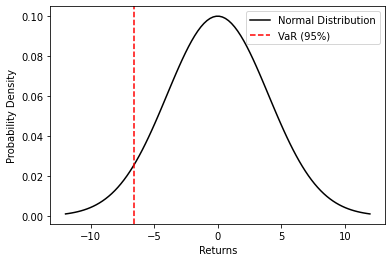

In [240]:

# create an x-axis array for the normal distribution plot

mu = DailyReturns_META_MeansRemoved.mean() *100
sigma = DailyReturns_META_MeansRemoved.std()*100

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plot the normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), 'k-', label='Normal Distribution')

# plot the VaR on the normal distribution plot
plt.axvline(x=-VaR_5_percent, color='red', linestyle='--', label='VaR (95%)')

# add a legend and axis labels
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Probability Density')

# show the plot
plt.show()

In [147]:
# #manually fix data so it can read most recent data first
# DailyReturns_META_MeansRemoved.to_csv("DailyReturns_META_MeansRemoved.csv")

In [150]:
# DailyReturns_META_MeansRemoved = pd.read_csv("DailyReturns_META_MeansRemoved.csv")


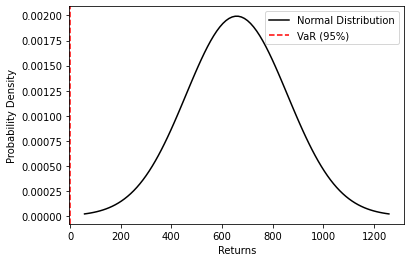

In [173]:

def calculate_Exponentially_Weighted_Variance_VaR(DailyReturns_META_MeansRemoved, alpha= .05, lam = .94):
    #First fix data so that the data frame gets inverted so that it can weight newest data point first
    DailyReturns_META_MeansRemoved = DailyReturns_META_MeansRemoved[::-1]


    #Calculate the exponentially weighted variance, Using adjust = true since it will weight the front
    Exponentially_Weighted_Variance = DailyReturns_META_MeansRemoved.ewm(alpha= 1-lam,adjust='False').var()

    Exponentially_Weighted_Variance = Exponentially_Weighted_Variance.dropna()
    sigma = np.sqrt(Exponentially_Weighted_Variance)

    mu = np.mean(DailyReturns_META_MeansRemoved)

    #calc VaR
    VaR = -(norm.ppf(alpha) * sigma - mu)*100

    return VaR


#return the vector of values
VaR_5_percent_EW = calculate_Exponentially_Weighted_Variance_VaR(DailyReturns_META_MeansRemoved,alpha = .05, lam = .94)

#Since VaR is min Loss on normal bad day, you calculate min of the vector 
mean_loss = VaR_5_percent_EW.min()
mean_loss

mu_EW = VaR_5_percent_EW.mean() *100
sigma_EW = VaR_5_percent_EW.std()*100

x = np.linspace(mu_EW - 3*sigma_EW, mu_EW + 3*sigma_EW, 100)

# plot the normal distribution
plt.plot(x, norm.pdf(x, mu_EW, sigma_EW), 'k-', label='Normal Distribution')

# plot the VaR on the normal distribution plot
plt.axvline(x=-mean_loss, color='red', linestyle='--', label='VaR (95%)')

# add a legend and axis labels
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Probability Density')

# show the plot
plt.show()

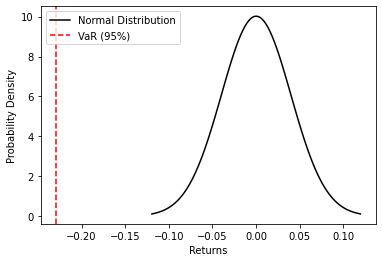

In [176]:
#Carry over log likelihood t 
from scipy.stats import t


# def log_likelihood_t(params, residuals):
#     df = len(residuals) - 1
#     loglik = -np.sum(t.logpdf(residuals, df, mu, sigma))
#     return loglik

# mu_MLE_T_Dist = np.mean(DailyReturns_META_MeansRemoved)
# sigma_MLE_T_Dist = np.std(DailyReturns_META_MeansRemoved)

# params = t.fit(DailyReturns_META_MeansRemoved)
# Degree_freedom = params[0]
# loc = params[1]
# scale = params[2]

# loglik = log_likelihood_t(params,DailyReturns_META_MeansRemoved)
# print(loglik)


def calcVaR_MLE_T_Dist(DailyReturns_META_MeansRemoved,alpha =.05):
    DailyReturns_META_MeansRemoved = DailyReturns_META_MeansRemoved.dropna()
    params = t.fit(DailyReturns_META_MeansRemoved)
    Degree_freedom = params[0]
    loc = params[1]
    scale = params[2]

    sigma = np.std(DailyReturns_META_MeansRemoved)
    mu = np.mean(DailyReturns_META_MeansRemoved)

    VaR = -(t.ppf(alpha, Degree_freedom, loc, scale)* sigma - mu)*100
    return VaR

VaR_5_percent_MLE_T_Dist = calcVaR_MLE_T_Dist(DailyReturns_META_MeansRemoved,alpha =.05)

VaR_5_percent_MLE_T_Dist


# calculate the mean and standard deviation of the returns
mu = np.mean(DailyReturns_META_MeansRemoved)
sigma = np.std(DailyReturns_META_MeansRemoved)



# create an array of x-values for the normal distribution plot
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plot the normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), 'k-', label='Normal Distribution')

# plot the VaR on the normal distribution plot
plt.axvline(x=-VaR_5_percent_MLE_T_Dist, color='red', linestyle='--', label='VaR (95%)')

# add a legend and axis labels
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Probability Density')

# show the plot
plt.show()


In [241]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats
def calculate_ARIMA_VaR(DailyReturns_META_MeansRemoved,alpha = .05):
    DailyReturns_META_MeansRemoved = DailyReturns_META_MeansRemoved.dropna()
    model = ARIMA(DailyReturns_META_MeansRemoved, order=(1, 0, 0))
    model_fit = model.fit()
    residuals = model_fit.resid
    sigma = np.std(residuals)
    mu = np.mean(residuals)
    VaR = -(stats.norm.ppf(alpha)* sigma - mu)*100
    return VaR

VaR_5_percent_ARIMA = calculate_ARIMA_VaR(DailyReturns_META_MeansRemoved,alpha = .05)
VaR_5_percent_ARIMA

c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


6.546933924174427

In [184]:
def calculate_Historical_Simulation_VaR(DailyReturns_META_MeansRemoved,alpha= .05):
    sorted_return = np.sort(DailyReturns_META_MeansRemoved)
    
    index = int(np.floor(alpha*len(DailyReturns_META_MeansRemoved)))
    #Calculate the VaR
    VaR = -sorted_return[index]
    return VaR

VaR_5_percent_Historical_Simulation = calculate_Historical_Simulation_VaR(DailyReturns_META_MeansRemoved,alpha= .05)

VaR_5_percent_Historical_Simulation



0.05590681367337082

In [201]:
# Problem 3

# import the data
portfolio = pd.read_csv("portfolio.csv")
portfolio = portfolio.set_index("Portfolio")
portfolio.head()

#


,Stock,Holding
Portfolio,,
A,AAPL,58
A,TSLA,10
A,JPM,64
A,HD,27
A,BAC,209


In [242]:

DailyPrices = pd.read_csv("DailyPrices.csv")
DailyPrices.head()

#index by date
DailyPrices = DailyPrices.set_index("Date")
DailyPrices.head()

#convert to datetime
DailyPrices.index = pd.to_datetime(DailyPrices.index)
DailyPrices.head()

#reset index
DailyPrices = DailyPrices.reset_index()
DailyPrices.head()


,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2022-02-14,432.011322,167.863144,292.261475,155.167007,291.920013,135.526001,135.300003,217.699997,242.443298,...,197.263107,64.592575,46.290192,151.118790,58.443172,377.068665,247.324020,48.182598,60.352272,66.789505
1,2022-02-15,438.978333,171.749573,297.680664,156.510498,307.476654,136.608505,136.425507,221.000000,264.702484,...,199.789520,64.328896,46.502743,159.029022,58.653572,372.440185,255.490829,49.446892,62.076630,67.673614
2,2022-02-16,439.470337,171.511032,297.333191,158.100494,307.796661,137.738007,137.487503,216.539993,264.862305,...,201.139511,64.172638,46.770744,165.211960,59.198696,377.000458,256.349976,50.203476,61.990410,65.915215
3,2022-02-17,430.082642,167.863144,288.626679,154.652496,292.116669,132.539002,132.308502,207.710007,244.841064,...,194.109894,64.514450,47.473091,157.448944,58.615318,378.822571,248.439911,48.600708,59.921181,64.019295
4,2022-02-18,427.297852,166.292648,285.846893,152.601502,285.660004,130.403000,130.467499,206.160004,236.199127,...,193.984528,64.455841,47.815025,157.380234,58.385788,376.571686,245.042847,48.381695,59.700851,64.981995


In [243]:
#index by Portfolio
# if portfolio.empty:
#     print("The dataframe is empty!")
# else:
#     print(portfolio.head())

#get a list of assets in each portfolio and their holdings
portfolio_A = pd.DataFrame(portfolio[portfolio.index == 'A'])
portfolio_B = pd.DataFrame(portfolio[portfolio.index == 'B'])
portfolio_C = pd.DataFrame(portfolio[portfolio.index == 'C'])

print(portfolio_A)



           Stock  Holding
Portfolio                
A           AAPL       58
A           TSLA       10
A            JPM       64
A             HD       27
A            BAC      209
A            XOM      140
A           AVGO       17
A            PEP       57
A            TMO       17
A          CMCSA      194
A           META       33
A            ACN       29
A           INTC      180
A           PYPL       57
A            MRK      123
A              T      368
A            LOW       42
A            NEE      121
A            AMD       74
A           INTU       19
A             MS      102
A           AMAT       60
A            CVS       95
A             GS       27
A             BA       45
A           SBUX      100
A             GE       97
A           ISRG       33
A             MU      103
A            NOW       19
A            ADP       44
A            PNC       46
A            ADI       59
A            SYK       38
A            TJX      141


In [244]:
#Portfolio A 


# #get DataFrame of prices for Stocks in the Stock column listed in portfolio_A
# def GetCorrespondingStockPrices(port_df, daily_price_df):
#     stocks = port_df['Stock'].unique()
#     stock_dfs = {}
#     for stock in stocks:
#         stock_df = daily_price_df[['Date', stock]].copy()
#         stock_df = stock_df.rename(columns={stock: 'Price'})
#         stock_dfs[stock] = stock_df
#     return stock_dfs

# stock_price_port_A = GetCorrespondingStockPrices(portfolio_A,DailyPrices)
# #convert dict to pandas dataframe


#reset index and index by date
# stock_price_port_A = stock_price_port_A.reset_index()

def GetCorrespondingStockPrices(port_df, daily_price_df):
    stocks = port_df['Stock'].unique()
    stock_dfs = {}
    for stock in stocks:
        stock_df = daily_price_df[['Date', stock]].copy()
        stock_df = stock_df.rename(columns={stock: 'Price'})
        stock_df = stock_df.set_index('Date')
        stock_dfs[stock] = stock_df
    return pd.concat(stock_dfs, axis=1)


stock_price_port_A = GetCorrespondingStockPrices(portfolio_A,DailyPrices)
stock_price_port_A.head()

stock_price_port_B = GetCorrespondingStockPrices(portfolio_B,DailyPrices)
stock_price_port_B.head()

stock_price_port_C = GetCorrespondingStockPrices(portfolio_C,DailyPrices)
stock_price_port_C.head()

,AMZN,GOOG,BRK-B,UNH,V,PFE,CSCO,CVX,ABBV,ABT,...,IBM,PLD,TGT,DE,MMM,F,LRCX,MO,LMT,TFC
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-14,155.167007,135.300003,314.279999,468.401306,223.574204,48.158161,51.454273,131.918076,137.756256,120.633438,...,123.971130,141.707809,204.248184,382.536041,151.582764,15.987771,550.406250,46.290192,377.068665,60.352272
2022-02-15,156.510498,136.425507,316.200012,472.182922,226.034775,48.148495,52.508900,130.952454,139.451721,121.812462,...,123.771118,141.980804,203.766251,388.601135,150.940002,16.555492,585.476502,46.502743,372.440185,62.076630
2022-02-16,158.100494,137.487503,315.649994,473.979858,227.026916,48.042118,52.489548,130.991486,140.521042,121.517708,...,123.047180,140.771805,204.385849,385.795776,149.299561,16.491394,583.159485,46.770744,377.000458,61.990410
2022-02-17,154.652496,132.308502,313.549988,464.392670,222.849899,47.287838,53.960224,130.318481,139.654022,118.471909,...,119.037056,139.699310,200.638657,375.888123,143.972290,16.061026,572.452087,47.473091,378.822571,59.921181
2022-02-18,152.601502,130.467499,314.799988,461.894623,220.944962,46.930035,55.353497,130.133148,138.748505,114.748161,...,118.446495,138.987549,201.022232,364.597534,142.984314,16.518867,561.981262,47.815025,376.571686,59.700851


In [ ]:
stock_returns_matrix_port_A= calculateReturns(methodOfCalculation= "Arti")